In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'serif'

golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  
figWidth = 3.37
mpl.rcParams['figure.figsize'] = figWidth, figWidth * 0.75

In [4]:
from xraycam import sharpcap

Use 15_51_33.ser as source data

1968900


<IPython.core.display.Javascript object>


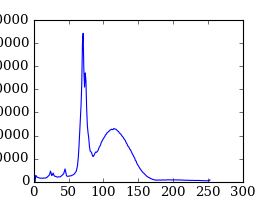

In [13]:
plt.plot(*sharpcap.full_process2('15_51_33.ser.gz', threshold = 2, window_low=5,
                                window_high=175, ylim = 2000))

In [2]:
def get_frames(path, threshold=2, window_low = 0, window_high = 255, ylim = 10000,
                 export_path = None):
    arr = sharpcap.ser_extract(path, dimx = 1080, dimy = 1920, nframes=100, dtype = np.uint8, offset=800)
    arr[arr <= threshold] = 0
    return arr

Use the highest-flux capture from the saturation test, since we want dense clusters:

In [6]:
frames = get_frames('16_16_43.ser.gz', threshold = 0)

<IPython.core.display.Javascript object>


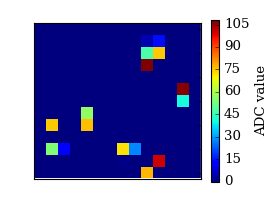

In [8]:
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',        # ticks along the top edge are off
    labelbottom='off',
left = 'off', labelleft = 'off') # labels along the bottom edge are off
plt.imshow(frames[10][129:142, 120:134], interpolation='none')
plt.colorbar(label = 'ADC value')
plt.savefig('clusters.png', dpi = 300, bbox_inches='tight')